In [15]:
import pandas as pd
metadata = '../pysarg/example/outputdir/metadata.txt'
output = '../pysarg/example/outputdir/output.txt'

In [16]:
m = pd.read_csv(metadata, sep='\t')
o = pd.read_csv(output, sep='\t')
df = pd.merge(m, o, on='sample')

In [17]:
df.head()

,sample,read_length,read_number,16s_number,cell_number,sequence,gene,gene_length,gene_type,gene_subtype,covered_length
0,STAS,100,200000,9.776536,3.05292,STAS_29,gi|671541568|ref|WP_031525212.1|,648,macrolide-lincosamide-streptogramin,macrolide-lincosamide-streptogramin__macB,31
1,STAS,100,200000,9.776536,3.05292,STAS_60,NP_840140,273,bacitracin,bacitracin__bacA,32
2,STAS,100,200000,9.776536,3.05292,STAS_69,gi|764440891|ref|WP_044366757.1|,439,multidrug,multidrug__TolC,30
3,STAS,100,200000,9.776536,3.05292,STAS_101,CP000675.2.gene1535.p01,226,unclassified,unclassified__transcriptional regulatory prote...,32
4,STAS,100,200000,9.776536,3.05292,STAS_111,gi|504871158|ref|WP_015058260.1|,218,quinolone,quinolone__qnrS,33


In [18]:
## ppm of gene_type
df.groupby(['gene_type','sample']).apply(lambda x: sum(1/x['read_number'])).unstack(fill_value=0)*1e6

sample,STAS,SWHAS104
gene_type,,
aminoglycoside,0.0,20.0
bacitracin,5.0,10.0
beta-lactam,0.0,45.0
macrolide-lincosamide-streptogramin,5.0,5.0
multidrug,10.0,40.0
quinolone,5.0,5.0
rifamycin,5.0,0.0
sulfonamide,5.0,15.0
tetracycline,0.0,20.0


In [19]:
## compute the coverage ratio
df['ratio'] = df.covered_length/df.gene_length

In [20]:
tab = df.groupby(['gene_type','sample']).apply(lambda x: sum(x['ratio']/x['cell_number'])).unstack(fill_value=0)
tab

sample,STAS,SWHAS104
gene_type,,
aminoglycoside,0.000000,0.136694
bacitracin,0.038395,0.064883
beta-lactam,0.000000,0.257412
macrolide-lincosamide-streptogramin,0.015670,0.014682
multidrug,0.030198,0.244137
quinolone,0.049584,0.042097
rifamycin,0.077072,0.000000
sulfonamide,0.035052,0.106534
tetracycline,0.000000,0.081963


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

In [8]:
pca = PCA(n_components=2)
p = pca.fit_transform(tab.T)

In [9]:
## if want to color the points, here is one example
ldict = {
    'STAS':'category_a',
    'SWHAS104':'category_b'
}

<Figure size 432x288 with 0 Axes>

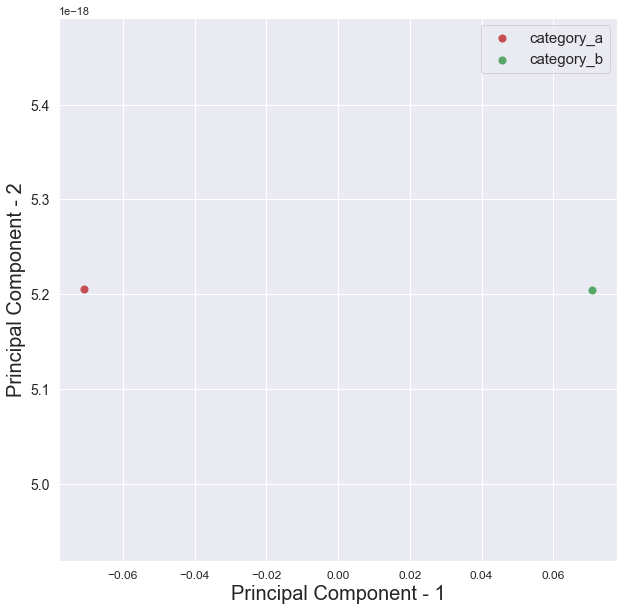

In [10]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
colors = ['r', 'g']
labels = sorted(list({ldict.get(x, 'unknown') for x in tab.columns}))
for label, color in zip(labels, colors):
    index =[ldict.get(x, 'unknown') == label for x in tab.columns]
    plt.scatter(p[index,0],p[index,1], c = color, s = 50)

plt.legend(labels,prop={'size': 15})
plt.show()